# **Penguin Data Classification**

ใช้ไฟล์ dataset ชื่อ penguin.csv และให้ทำการแก้ไข
เพิ่มเติม Code ในไฟล์ IRIS_Classification.ipynb

ให้ทำการทดลองและทำการพิมพ์รายงานผลการทดลองในเอกสาร Microsoft Word (HW2_650510714.docx)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


penguin = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Data Mining/penguin.csv')
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## **Data Preprocessing**

Dealing with Missing (NaN) Data

In [127]:
print(penguin.isnull().sum())
penguin[penguin.isna().any(axis=1)]

species               0
island                0
bill_length_mm        4
bill_depth_mm         4
flipper_length_mm     6
body_mass_g           3
sex                  11
year                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
24,Adelie,Biscoe,NaN,NaN,180.0,3800.0,male,2007
35,Adelie,Dream,39.2,NaN,NaN,NaN,male,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
57,Adelie,Biscoe,NaN,18.8,193.0,3800.0,male,2008
95,Adelie,Dream,40.8,18.9,NaN,4300.0,male,2008


Impute **numerical features** with **mean** and **categorical featur**e with **most frequent**

In [128]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical features
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguin[numerical_cols] = numerical_imputer.fit_transform(penguin[numerical_cols])

# Impute categorical feature
categorical_cols = ['sex']
penguin[categorical_cols] = categorical_imputer.fit_transform(penguin[categorical_cols])

In [129]:
print(penguin.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


Specify Columns as Features and the First Column as Class (species)

In [130]:
# Specify Columns as Features X and the First Column as Class y
X = penguin.iloc[:, 1:7]
y = penguin.iloc[:, 0]

In [131]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.100000,18.700000,181.000000,3750.000000,male
1,Torgersen,39.500000,17.400000,186.000000,3800.000000,female
2,Torgersen,40.300000,18.000000,195.000000,3250.000000,female
3,Torgersen,43.946765,17.139412,200.955621,4201.906158,male
4,Torgersen,36.700000,19.300000,193.000000,3450.000000,female


In [132]:
X.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

Convert categorical features into numerical via **One-Hot Encoding**

In [133]:
print(X.island.unique())
print(X.sex.unique())

['Torgersen' 'Biscoe' 'Dream']
['male' 'female']


In [134]:
transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['island', 'sex'])], remainder='passthrough')
X = transformer.fit_transform(X)

feature_names = list(transformer.named_transformers_['onehot'].get_feature_names_out(['island', 'sex'])) + ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = pd.DataFrame(X, columns=feature_names)

X.head()

,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.0,0.0,1.0,0.0,1.0,39.100000,18.700000,181.000000,3750.000000
1,0.0,0.0,1.0,1.0,0.0,39.500000,17.400000,186.000000,3800.000000
2,0.0,0.0,1.0,1.0,0.0,40.300000,18.000000,195.000000,3250.000000
3,0.0,0.0,1.0,0.0,1.0,43.946765,17.139412,200.955621,4201.906158
4,0.0,0.0,1.0,1.0,0.0,36.700000,19.300000,193.000000,3450.000000


In [135]:
print(y.unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [137]:
class_counts = y.value_counts()
class_counts

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


## **Model Training**

### **K-Nearest Neighbor (KNN)**

In [147]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Initialize and train the model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [148]:
# Predict Test Data using Learned Model
y_pred = model.predict(X_test)
print(y_pred)

['Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Gentoo'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo'
 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Gentoo'
 'Gentoo' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo'
 'Chinstrap' 'Gentoo' 'Adelie' 'Chinst

In [149]:
# Evaluate predicted class label with actual class label using Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy)

# Evaluate the performance of model using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Evaluate test results with Precision, Recall, F1-Score
print ("\n", classification_report(y_test, y_pred))

Accuracy = 0.8260869565217391

Confusion Matrix:
 [[51  6  3]
 [ 9 13  3]
 [ 2  1 50]]

               precision    recall  f1-score   support

      Adelie       0.82      0.85      0.84        60
   Chinstrap       0.65      0.52      0.58        25
      Gentoo       0.89      0.94      0.92        53

    accuracy                           0.83       138
   macro avg       0.79      0.77      0.78       138
weighted avg       0.82      0.83      0.82       138



ทดลองใช้ค่า k=1, k=3, k=5 พบว่า **k=1 ให้ความแม่นยำสูงสุด** รองลงมาคือ k=3 และ k=5 ตามลำดับ

### **Build the Models and Test the Models using Other Classifier Algorithms**

KNN-1: 0.826087
KNN-3: 0.797101
KNN-5: 0.753623
KNN-7: 0.804348
Tree: 0.963768
GaussianNB: 0.847826


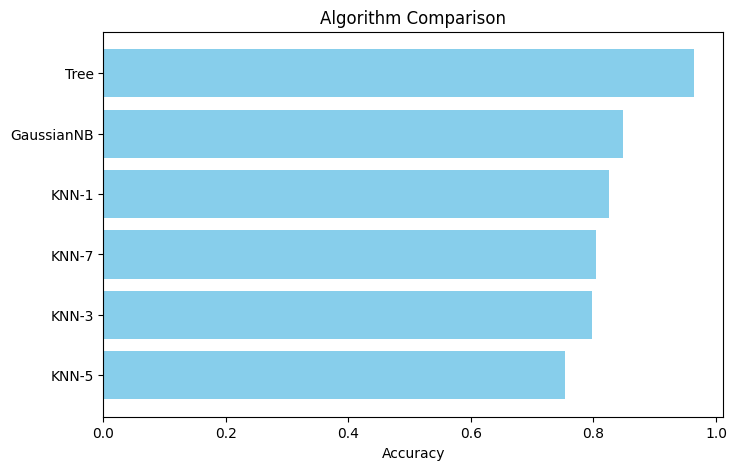

In [150]:
models = [('KNN-1', KNeighborsClassifier(n_neighbors=1)),
          ('KNN-3', KNeighborsClassifier(n_neighbors=3)),
          ('KNN-5', KNeighborsClassifier(n_neighbors=5)),
          ('KNN-7', KNeighborsClassifier(n_neighbors=7)),
          ('Tree', DecisionTreeClassifier()),
          ('GaussianNB', GaussianNB())]

# Train and evaluate models
results = []
for name, clf in models:
    clf.fit(X_train, y_train)
    predicted_class = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted_class)
    results.append((name, accuracy))
    print(f"{name}: {accuracy:.6f}")

# Sort results for better visualization
results.sort(key=lambda x: x[1], reverse=True)
names, scores = zip(*results)

# Visualization
plt.figure(figsize=(8, 5))
plt.barh(names, scores, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Algorithm Comparison")
plt.gca().invert_yaxis()  # Highest accuracy at the top
plt.show()

Choose the model that gives the **best performance: Decision Tree Classifier**



In [190]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [191]:
# Report Training Model (Accuracy, Precision, Recall, F-measure)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree - Accuracy: {accuracy:.6f}")

cm = confusion_matrix(y_test, y_pred)
print("\nDecision Tree - Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("\nDecision Tree - Classification Report:\n", report)

Decision Tree - Accuracy: 0.963768

Decision Tree - Confusion Matrix:
 [[57  2  1]
 [ 1 23  1]
 [ 0  0 53]]

Decision Tree - Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      0.95      0.97        60
   Chinstrap       0.92      0.92      0.92        25
      Gentoo       0.96      1.00      0.98        53

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



Fill in the values of each features for Prediction

In [154]:
island_Biscoe = True #@param {type:"boolean"}
island_Dream = False #@param {type:"boolean"}
island_Torgersen = False #@param {type:"boolean"}
sex_female = False #@param {type:"boolean"}
sex_male = True #@param {type:"boolean"}
bill_length_mm = 39.1  #@param {type:"number"}
bill_depth_mm = 18.7   #@param {type:"slider", min:10, max:30, step:0.1}
flipper_length_mm = 181.0  #@param {type:"slider", min:150, max:250, step:1}
body_mass_g = 3750.0  #@param {type:"slider", min:2500, max:7000, step:50}

In [155]:
TestingData = [[island_Biscoe, island_Dream, island_Torgersen,
                sex_female, sex_male, bill_length_mm,
                bill_depth_mm, flipper_length_mm, body_mass_g]]

prediction = model.predict(TestingData)
print(prediction)

['Adelie']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Chosen Model: **Gradient Boosting**

Gradient Boosting Classifier (GBC) เป็นโมเดลที่ใช้ ensemble learning แบบ boosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1)

# ทำ 10-Fold Cross-Validation
cv_scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring='accuracy')

# แสดงค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานของ Accuracy
print(f'Gradient Boosting - Mean Accuracy: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}')

Gradient Boosting - Mean Accuracy: 0.9855, Std: 0.0222


In [166]:
# Train the Gradient Boosting Classifier
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier - Accuracy: {accuracy_gbc:.4f}")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier - Accuracy: 0.9928
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        60
   Chinstrap       1.00      0.96      0.98        25
      Gentoo       1.00      1.00      1.00        53

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



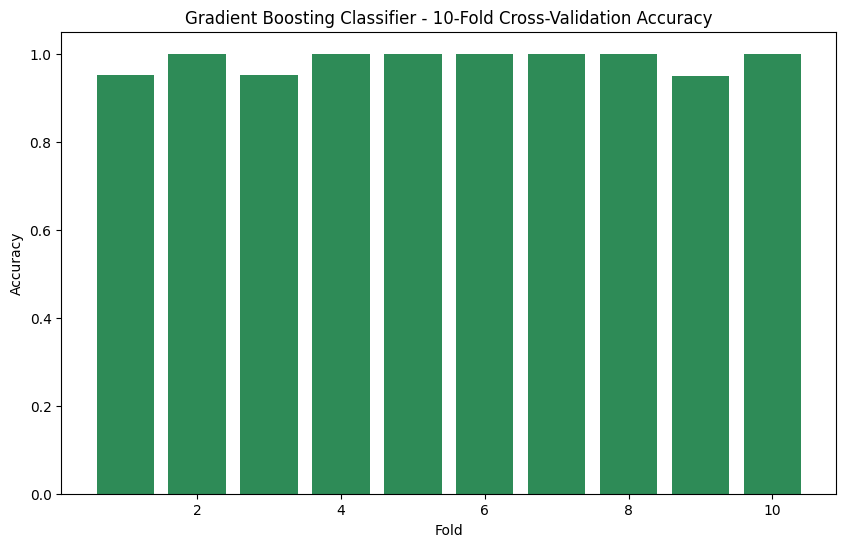

In [182]:
# Performance in each fold (Bar Plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='seagreen')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier - 10-Fold Cross-Validation Accuracy')
#plt.grid(True, linestyle='--')
plt.show()

ทำการเขียน Code เพื่อนำ Test dataset มาใช้ทดสอบประสิทธิภาพการทำนายผลของโมเดลที่เรียนรู้มา (GBC) ทำการรายงานผลประสิทธิภาพของการทดลองในรูปแบบตารางและในรูปแบบกราฟ

Gradient Boosting Classifier - Accuracy: 0.9928

Gradient Boosting - Confusion Matrix:
 [[60  0  0]
 [ 1 24  0]
 [ 0  0 53]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        60
   Chinstrap       1.00      0.96      0.98        25
      Gentoo       1.00      1.00      1.00        53

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138


Classification Report (Table):
               precision    recall  f1-score     support
Adelie         0.983607  1.000000  0.991736   60.000000
Chinstrap      1.000000  0.960000  0.979592   25.000000
Gentoo         1.000000  1.000000  1.000000   53.000000
accuracy       0.992754  0.992754  0.992754    0.992754
macro avg      0.994536  0.986667  0.990442  138.000000
weighted avg   0.992872  0.992754  0.992710  138.000000


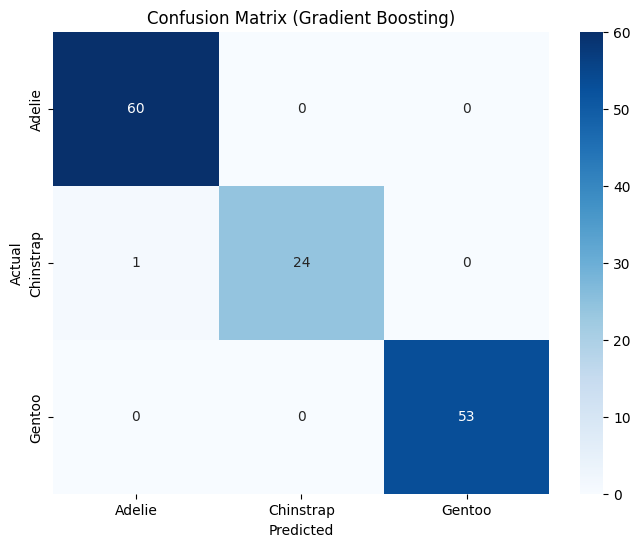

In [195]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_gbc = gbc.predict(X_test) # Predict on the test set

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Gradient Boosting Classifier - Accuracy: {accuracy_gbc:.4f}")
cm = confusion_matrix(y_test, y_pred_gbc)
print("\nGradient Boosting - Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred_gbc, output_dict=True) #output_dict for better formatting
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gbc))

# Display the classification report as a table
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report (Table):\n", report_df)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()

<ipython-input-196-9bfb423a890f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


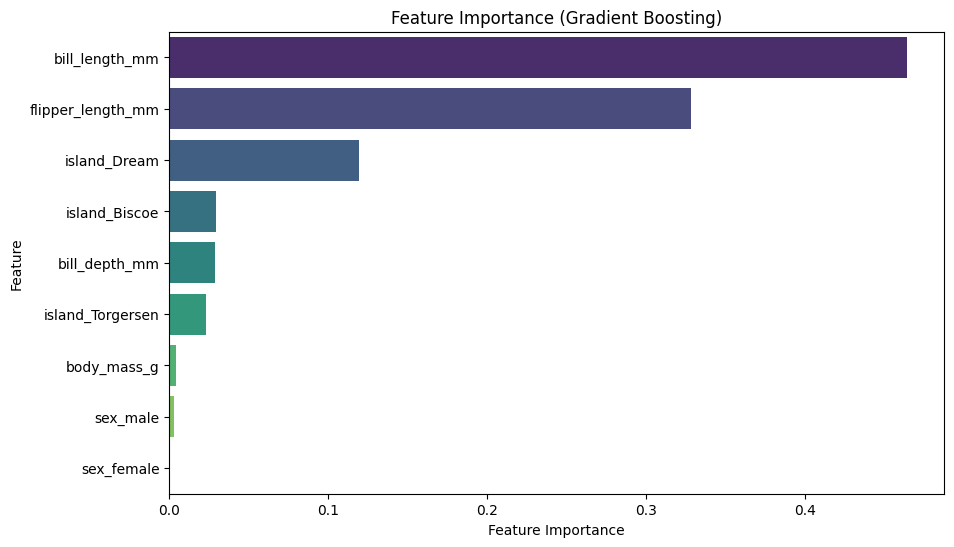

In [196]:
feature_importance = gbc.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()